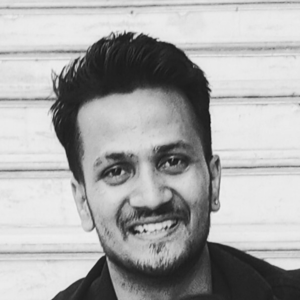

In [14]:
from PIL import Image
from IPython.display import display

def display_team_members(command):
    if "print the team member detail" in command.lower():
        # Paths to the images
        img_paths = [
            r"E:\DOCUMENT\Picture\Dlspr.jpg"  # Correct file path placement
        ]

        # Open the images
        images = [Image.open(img_path) for img_path in img_paths]
        
        # Resize all images to be the same size (e.g., 300x300 pixels)
        images = [img.resize((300, 300)) for img in images]
        
        # Define the gap size
        gap = 20  # Change this value to adjust spacing
        
        # Calculate total width including gaps
        total_width = sum(img.width for img in images) + gap * (len(images) - 1)
        max_height = max(img.height for img in images)
        
        # Create a new blank image with the combined width and max height
        new_image = Image.new('RGB', (total_width, max_height), (255, 255, 255))
        
        # Paste the images onto the blank image with gaps
        x_offset = 0
        for img in images:
            new_image.paste(img, (x_offset, 0))
            x_offset += img.width + gap  # Move offset forward by image width + gap
        
        # Display the new combined image
        display(new_image)

# Example usage
command = "print the TEAM MEMBER DETAIL"
display_team_members(command)


In [12]:
def print_topic(command):
    if "print a topic" in command.lower():
        print("DECODING E-COMMERCE: A DEEP DRIVE INTO CUSTOMER AND SALES DATA_BY GROUP15")
    else:
        print("No topic to display.")

# Example usage
command = "print a topic"
print_topic(command)


DECODING E-COMMERCE: A DEEP DRIVE INTO CUSTOMER AND SALES DATA_BY GROUP15


In [15]:
def print_team_details(command):
    if "Student" in command:
        print("NAME:PANKAJ RAY,")
        print("PRN: 23020841221,")
    else:
        print("No team information available.")

# Example usage
command = "Student"
print_team_details(command)


NAME:PANKAJ RAY,
PRN: 23020841221,


In [5]:
import os
import pandas as pd

filepath = r"D:\datasets\ecom_transaction.csv"

if not os.path.exists(filepath):
    print("file does not exist")
    exit(0)
else:
    print("dataset exists successfully!!")



dataset exists successfully!!


In [7]:
# Reading the dataset
sales_df = pd.read_csv(filepath)

sales_df.head() # default display upto 5 rows starting with 0


,CID,TID,Gender,Age Group,Purchase Date,Product Category,Discount Availed,Discount Name,Discount Amount (INR),Gross Amount,Net Amount,Purchase Method,Location
0,943146,5876328741,Female,25-45,30/08/2023 20:27:08,Electronics,Yes,FESTIVE50,64.30,725.304000,661.004000,Credit Card,Ahmedabad
1,180079,1018503182,Male,25-45,23/02/2024 09:33:46,Electronics,Yes,SEASONALOFFER21,175.19,4638.991875,4463.801875,Credit Card,Bangalore
2,337580,3814082218,Other,60 and above,06/03/2022 09:09:50,Clothing,Yes,SEASONALOFFER21,211.54,1986.372575,1774.832575,Credit Card,Delhi
3,180333,1395204173,Other,60 and above,04/11/2020 04:41:57,Sports & Fitness,No,NaN,0.00,5695.612650,5695.612650,Debit Card,Delhi
4,447553,8009390577,Male,18-25,31/05/2022 17:00:32,Sports & Fitness,Yes,WELCOME5,439.92,2292.651500,1852.731500,Credit Card,Delhi


In [9]:
# display size of the dataset
sales_df.shape


(55000, 13)

In [11]:
sales_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55000 entries, 0 to 54999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CID                    55000 non-null  int64  
 1   TID                    55000 non-null  int64  
 2   Gender                 55000 non-null  object 
 3   Age Group              55000 non-null  object 
 4   Purchase Date          55000 non-null  object 
 5   Product Category       55000 non-null  object 
 6   Discount Availed       55000 non-null  object 
 7   Discount Name          27415 non-null  object 
 8   Discount Amount (INR)  55000 non-null  float64
 9   Gross Amount           55000 non-null  float64
 10  Net Amount             55000 non-null  float64
 11  Purchase Method        55000 non-null  object 
 12  Location               55000 non-null  object 
dtypes: float64(3), int64(2), object(8)
memory usage: 5.5+ MB


In [13]:
# count no of unique customer base over location
# customer_base = sales_df.groupby("Location")["CID"]
# customer_base.nunique()

customer_base = sales_df.groupby("Location").agg({"CID":"nunique"}).reset_index()
customer_base.columns = ["Location","Total_Customers"]

customer_base.head()

,Location,Total_Customers
0,Ahmedabad,2684
1,Bangalore,7386
2,Chennai,4123
3,Dehradun,547
4,Delhi,9440


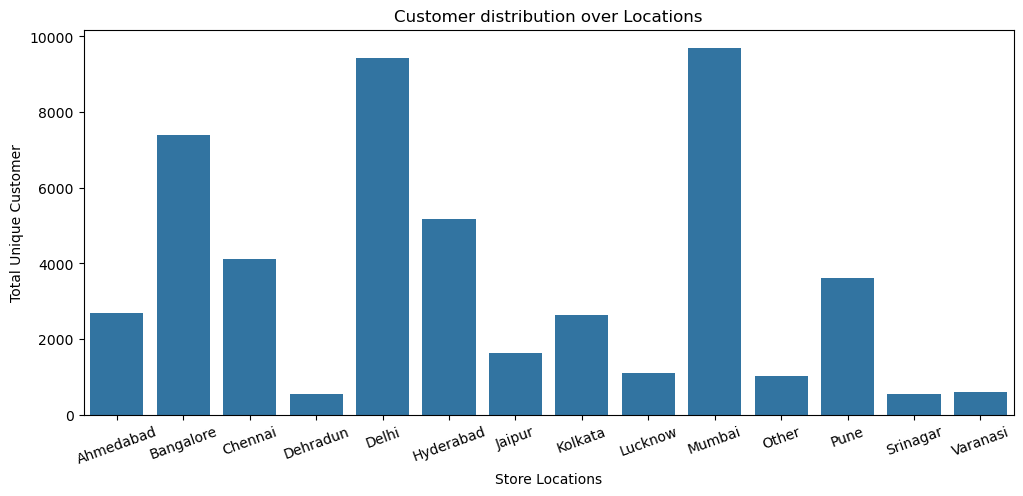

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
# plt.hist(x= customer_base['CID'], orientation='horizontal', label=customer_base['Location'] )
# plt.show()

########### CUSTOMER DISTRIBUTION OVER LOCATIONS #########################
plt.figure(figsize=(12,5))
sns.barplot(x='Location', y='Total_Customers', data=customer_base)
plt.title("Customer distribution over Locations")
plt.xlabel("Store Locations")
plt.ylabel("Total Unique Customer")
plt.xticks(rotation=20)
plt.show()

### SALES TREND OVER TIME ###



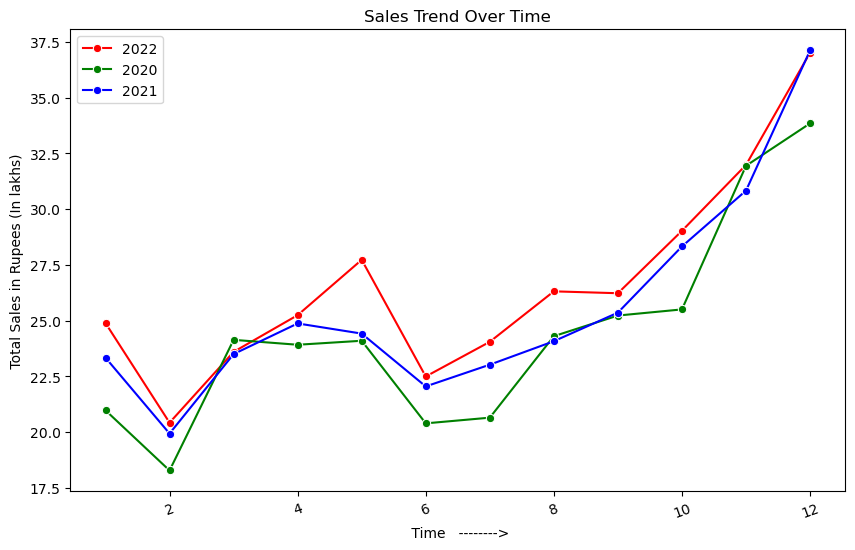

In [19]:
# before the Purchase Date was object so we have to convert into Day
sales_df['Purchase Date'] = pd.to_datetime(sales_df["Purchase Date"], dayfirst=True)
sales_df['PurchaseDate'] = sales_df['Purchase Date'].dt.date
sales_df['Year'] = pd.DatetimeIndex(sales_df["Purchase Date"]).year
sales_df['Month'] = pd.DatetimeIndex(sales_df["Purchase Date"]).month
# sales_df['Month'] = sales_df['Purchase Date'].dt.strftime('%b')
salesByDate = sales_df.groupby(["Year","Month"])["Net Amount"].sum().reset_index()
salesByDate.columns = ["Year","Month","TotalSales"] 
salesByDate["TotalSales"] = salesByDate["TotalSales"].apply(lambda x: float(x/100000))

salesByYear2022 = salesByDate[salesByDate["Year"]==2022]
salesByYear2020 = salesByDate[salesByDate["Year"]==2020]
salesByYear2021 = salesByDate[salesByDate["Year"]==2021]


plt.figure(figsize=(10,6))
# sns.lineplot(x="PurchaseDate", y="Net Amount", data=salesByYear2019, marker='o', color="red")
sns.lineplot(x="Month", y="TotalSales", data=salesByYear2022, marker='o', color="red", label="2022")
sns.lineplot(x="Month", y="TotalSales", data=salesByYear2020, marker='o', color="green", label="2020")
sns.lineplot(x="Month", y="TotalSales", data=salesByYear2021, marker='o', color="blue", label="2021")


plt.title("Sales Trend Over Time")
plt.xlabel(" Time   -------->")
plt.ylabel(" Total Sales in Rupees (In lakhs) ")
plt.xticks(rotation=20)
plt.show()

# salesByDate.head()
# salesByYear2019.head()

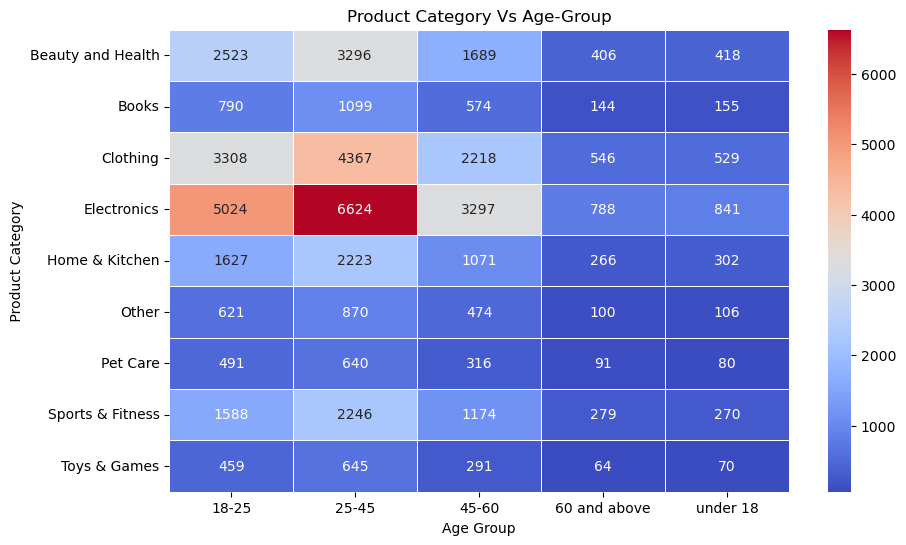

In [21]:
product_pivot = sales_df.pivot_table(index="Product Category", columns="Age Group", values="Net Amount", aggfunc="count")

plt.figure(figsize=(10,6))
sns.heatmap(product_pivot, annot=True, cmap="coolwarm", fmt=".0f", linewidths="0.5")
plt.title("Product Category Vs Age-Group")
plt.xlabel("Age Group")
plt.ylabel(" Product Category ")
plt.show()


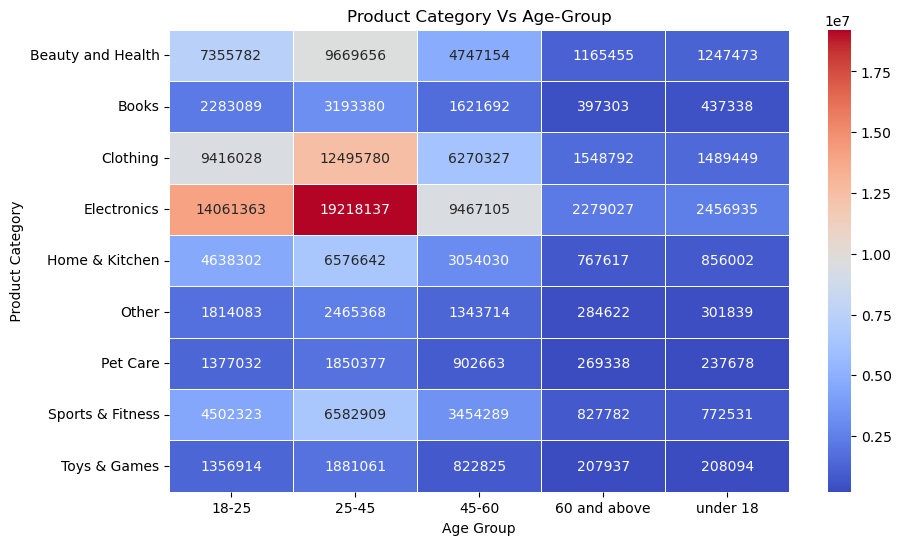

In [141]:
sales_pivot = sales_df.pivot_table(index="Product Category", columns="Age Group", values="Net Amount", aggfunc="sum")

plt.figure(figsize=(10,6))
sns.heatmap(sales_pivot, annot=True, cmap="coolwarm", fmt=".0f", linewidths="0.5")
plt.title("Product Category Vs Age-Group")
plt.xlabel("Age Group")
plt.ylabel(" Product Category ")
plt.show()


16574
10968
8332
F-statistic: 2.5626
p-value: 0.0771
There is no significant difference among the groups.


<Axes: xlabel='Category', ylabel='Values'>

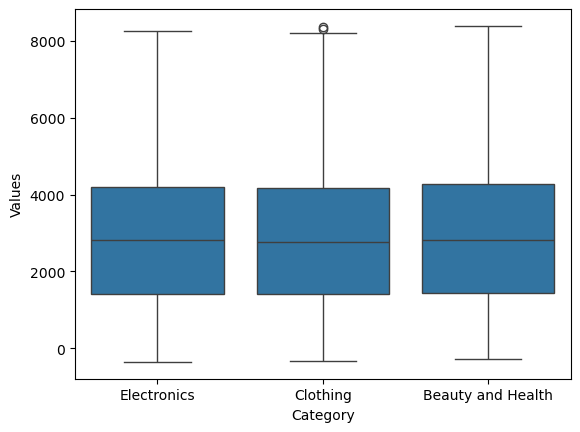

In [25]:
# Anova : compare means of 3 or more groups to determine if there is significant or not difference between them
from scipy.stats import f_oneway

# comparing top 3 product_category groups mean

top3ProductCategory = sales_df.groupby("Product Category")["Net Amount"].sum().reset_index()
top3ProductCategory.columns=['ProductCategory','TotalSales']
top3ProductCategory = top3ProductCategory.sort_values(by=['TotalSales'], ascending=False)
groups = top3ProductCategory.head(3)['ProductCategory']
#convert to list
groups = groups.tolist()
groupSales = list()
for groupval in groups:
    groupSales.append(sales_df[sales_df["Product Category"]==groupval]['Net Amount'].tolist())
    # groupSales.append(sales_df[groupval]['Net Amount'])

print(len(groupSales[0]))
print(len(groupSales[1]))
print(len(groupSales[2]))

# # Test scores for each group
# group_a = [85, 88, 84, 87, 86]
# group_b = [78, 82, 80, 85, 83]
# group_c = [90, 94, 88, 92, 89]

# # Perform one-way ANOVA
# f_stat, p_value = f_oneway(group_a, group_b, group_c)
f_stat, p_value = f_oneway(groupSales[0], groupSales[1], groupSales[2])


print(f"F-statistic: {f_stat:.4f}")
print(f"p-value: {p_value:.4f}")

# Interpretation
if p_value < 0.05:
    print("There is a significant difference among the groups.")
else:
    print("There is no significant difference among the groups.")

data = {
    "Category": [groups[0]] * len(groupSales[0]) + [groups[1]] * len(groupSales[1]) + [groups[2]] * len(groupSales[2]),
    "Values": groupSales[0] + groupSales[1]+ groupSales[2],    
}

df = pd.DataFrame(data)
sns.boxplot(data=df ,x='Category', y = 'Values')

In [67]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

sales_df['Year'] = pd.DatetimeIndex(sales_df['Purchase Date']).year
input_df = sales_df.groupby(["Year"])["Net Amount"].sum().reset_index()
X = input_df[["Year"]].values
y = input_df["Net Amount"].apply(lambda x: x/100000).values


# Multi linear regression
# sales_df['Year'] = pd.DatetimeIndex(sales_df['Purchase Date']).year
# sales_df['Month'] = pd.DatetimeIndex(sales_df['Purchase Date']).month


# input_df = sales_df.groupby(["Year","Month","Product Category"])["Net Amount"].sum().reset_index()
# # input_df.head()


# # convert Label to encoder
# le = LabelEncoder()
# input_df['Product Category'] = le.fit_transform(input_df['Product Category'])


# X = input_df[["Year","Month","Product Category"]].values
# y = input_df["Net Amount"].values

# print(input_df)

# print(X)



Intercept: -103151.0807730172
Coefficient: [51.16902051]
R^2 Score: -0.1813890913537386


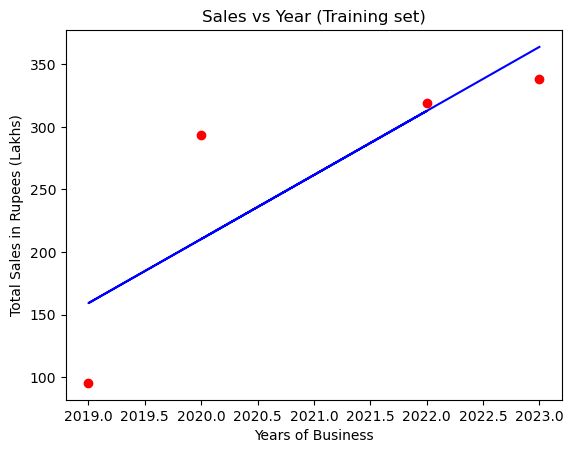

In [69]:
# MODEL PREDICTION USING LINEAR REGRETION

# X = input_df[:,:-1]
# y = input_df[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)


regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)
print("Intercept:", regressor.intercept_)
print("Coefficient:", regressor.coef_)
print("R^2 Score:", regressor.score(X, y))

plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Sales vs Year (Training set)')
plt.xlabel('Years of Business')
plt.ylabel('Total Sales in Rupees (Lakhs)')
plt.show()



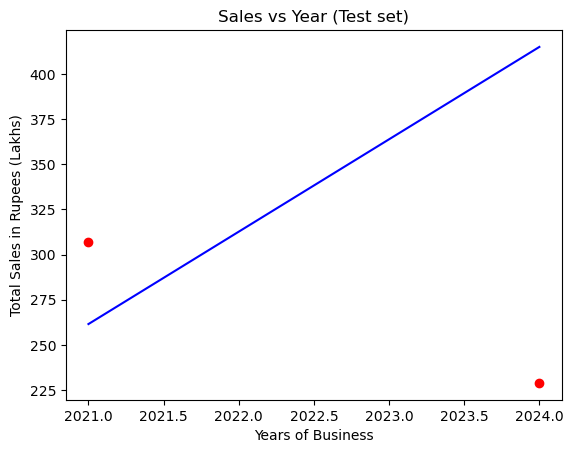

In [71]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_test, regressor.predict(X_test), color = 'blue')
plt.title('Sales vs Year (Test set)')
plt.xlabel('Years of Business')
plt.ylabel('Total Sales in Rupees (Lakhs)')
plt.show()